In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Data Collection

import pandas as pd
data= pd.read_csv(r"/content/drive/My Drive/Colab/Property_Price_Train.csv")
pd.set_option('display.max_columns', None,'display.max_rows',None)


In [3]:
data

Output hidden; open in https://colab.research.google.com to view.

In [4]:
# Data preprocessing
data.shape

(1459, 81)

In [5]:
data.isnull().sum() / 1459 * 100 # To find percentage of null values

Id                            0.000000
Building_Class                0.000000
Zoning_Class                  0.000000
Lot_Extent                   17.751885
Lot_Size                      0.000000
Road_Type                     0.000000
Lane_Type                    93.762851
Property_Shape                0.000000
Land_Outline                  0.000000
Utility_Type                  0.000000
Lot_Configuration             0.000000
Property_Slope                0.000000
Neighborhood                  0.000000
Condition1                    0.000000
Condition2                    0.000000
House_Type                    0.000000
House_Design                  0.000000
Overall_Material              0.000000
House_Condition               0.000000
Construction_Year             0.000000
Remodel_Year                  0.000000
Roof_Design                   0.000000
Roof_Quality                  0.000000
Exterior1st                   0.000000
Exterior2nd                   0.000000
Brick_Veneer_Type        

In [6]:
data=data.drop(['Lane_Type','Pool_Quality','Fence_Quality','Id','Fireplace_Quality','Miscellaneous_Feature'],axis=1)

In [7]:
data.shape

(1459, 75)

In [8]:
data.isnull().sum()

Building_Class                 0
Zoning_Class                   0
Lot_Extent                   259
Lot_Size                       0
Road_Type                      0
Property_Shape                 0
Land_Outline                   0
Utility_Type                   0
Lot_Configuration              0
Property_Slope                 0
Neighborhood                   0
Condition1                     0
Condition2                     0
House_Type                     0
House_Design                   0
Overall_Material               0
House_Condition                0
Construction_Year              0
Remodel_Year                   0
Roof_Design                    0
Roof_Quality                   0
Exterior1st                    0
Exterior2nd                    0
Brick_Veneer_Type              8
Brick_Veneer_Area              8
Exterior_Material              0
Exterior_Condition             0
Foundation_Type                0
Basement_Height               37
Basement_Condition            37
Exposure_L

In [9]:
data.Exposure_Level.fillna('No' , inplace = True) 
data.BsmtFinType1.fillna('Unf' , inplace = True) 
data.BsmtFinType2.fillna('Unf' , inplace = True) 
data.Electrical_System.fillna('SBrkr' , inplace = True) 
data.Garage.fillna('Attchd' , inplace = True) 
data.Garage_Finish_Year.fillna('Unf' , inplace = True) 
data.Garage_Quality.fillna('TA' , inplace = True) 
data.Garage_Condition.value_counts() 
data.Basement_Condition.fillna('TA' , inplace = True) 
data.Basement_Height.fillna('TA' , inplace = True) 
data.Brick_Veneer_Type.fillna('TA' , inplace = True) 

data.Lot_Extent.fillna(data.Lot_Extent.mean() , inplace = True) 
data.Garage_Built_Year.fillna(data.Garage_Built_Year.mean() , inplace = True) 
data.Garage_Condition.fillna("TA" , inplace = True) 
data.Brick_Veneer_Area = data.Brick_Veneer_Area.fillna(data.Brick_Veneer_Area.mean()) 


In [10]:
data.isnull().sum()

Building_Class               0
Zoning_Class                 0
Lot_Extent                   0
Lot_Size                     0
Road_Type                    0
Property_Shape               0
Land_Outline                 0
Utility_Type                 0
Lot_Configuration            0
Property_Slope               0
Neighborhood                 0
Condition1                   0
Condition2                   0
House_Type                   0
House_Design                 0
Overall_Material             0
House_Condition              0
Construction_Year            0
Remodel_Year                 0
Roof_Design                  0
Roof_Quality                 0
Exterior1st                  0
Exterior2nd                  0
Brick_Veneer_Type            0
Brick_Veneer_Area            0
Exterior_Material            0
Exterior_Condition           0
Foundation_Type              0
Basement_Height              0
Basement_Condition           0
Exposure_Level               0
BsmtFinType1                 0
BsmtFinS

In [11]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [12]:
data[data.select_dtypes(include=['object']).columns] = data[data.select_dtypes(include=['object']).columns].apply(le.fit_transform) 

In [13]:
# Data Sampling
from sklearn.model_selection import train_test_split 

In [14]:
data_x = data.iloc[: , 0:74] 
data_y = data.iloc[: , 74]

In [15]:
data_x_train , data_x_test , data_y_train , data_y_test = train_test_split(data_x , data_y , test_size = .2)

In [16]:
# Train the model
from sklearn.linear_model import LinearRegression

In [17]:
reg_data = LinearRegression() # initialize the function
reg_data.fit(data_x_train, data_y_train) # train model

pred_train = reg_data.predict(data_x_train)
pred_test = reg_data.predict(data_x_test)

In [18]:
# Find Rsquare

Rsquare = reg_data.score(data_x_train, data_y_train)
print("Value of Rsquare is: ", Rsquare)

Value of Rsquare is:  0.871859871427177


In [19]:
#Adjusted Rsquare
# 1-[(1-Rsquare)*(N-1)/(N-K-1)]

N = data_x_train.shape[0] #number of records
K = data_x_train.shape[1] # number of X vars

Rsquare = reg_data.score(data_x_train, data_y_train)

AdjRsquare = 1 - (1-Rsquare) * (N-1)/ (N-K-1)
print("Adjusted Rsquare is ------->  ", AdjRsquare)

Adjusted Rsquare is ------->   0.8631763828608868


In [20]:
reg_data.intercept_ 


2161625.4911024487

In [21]:
reg_data.coef_

array([-1.03790673e+02, -8.05902944e+02,  5.36922304e+01,  5.27778542e-01,
        3.14415694e+04, -4.29715700e+02,  1.55011840e+03, -3.59774034e+04,
       -4.65249738e+02,  2.26625298e+03,  3.13551587e+02, -2.15487605e+03,
       -1.32648960e+04, -1.12735591e+03, -8.23365440e+02,  1.04282149e+04,
        6.19269638e+03,  2.15852755e+02,  6.12917502e+01,  1.33328838e+03,
        9.81769670e+03, -7.89999307e+02,  1.11386467e+02,  5.14862002e+03,
        2.62119369e+01, -7.81107855e+03,  3.44672313e+02,  3.36785840e+03,
       -7.83457425e+03,  2.40557852e+03, -3.71871396e+03,  2.79825202e+02,
        1.55821855e+01,  1.00866069e+03,  1.25347320e+01, -5.05954533e+00,
        2.30573721e+01, -2.72298210e+03, -9.67025591e+02, -1.45069556e+03,
       -6.83643232e+02,  1.99927354e+01,  2.87627007e+01, -2.05601394e+01,
        2.81952967e+01,  1.21871096e+03, -3.22826127e+03,  8.67149740e+01,
        6.69901097e+02, -4.89014671e+03, -9.42612446e+03, -6.23373738e+03,
        2.51127128e+03,  

In [22]:
pred_train_data = reg_data.predict(data_x_train) 
pred_test_data = reg_data.predict(data_x_test) 

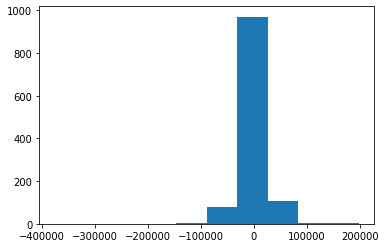

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
error_train_data = data_y_train - pred_train_data

plt.hist(error_train_data ); 

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


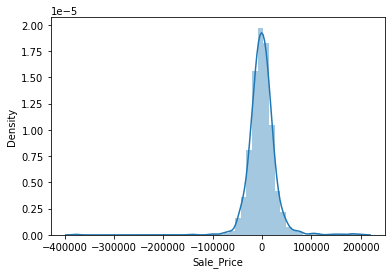

In [24]:
sns.distplot(error_train_data)

In [25]:
error_test_data = data_y_test - pred_test_data


In [26]:
import numpy as np
MSE = np.mean(np.square(error_test_data))
MSE

1989004349.0312057

In [27]:
RMSE = np.sqrt(MSE)
RMSE

44598.25499984507

In [28]:
MAPE = np.mean(np.abs(error_test_data / data_y_test))

Accuracy = 100 - MAPE * 100
Accuracy

88.15189107736734

In [29]:
pred_actual_train = pd.DataFrame({"Actual" :data_y_train , "Predicted" : pred_train_data})
pred_actual_train

,Actual,Predicted
731,187500,223020.168948
692,335000,305891.708219
1416,122500,129566.460313
131,244000,228687.854527
145,130000,175480.053448
823,139500,139495.390361
573,170000,164336.139335
35,309000,311430.737490
786,139000,158072.809585
463,188700,161754.933072


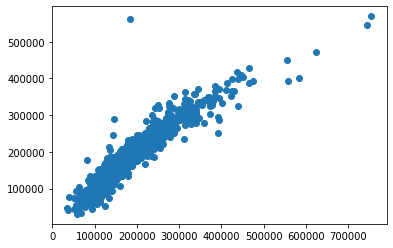

In [30]:
plt.scatter(x = 'Actual', y = 'Predicted', data = pred_actual_train )

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


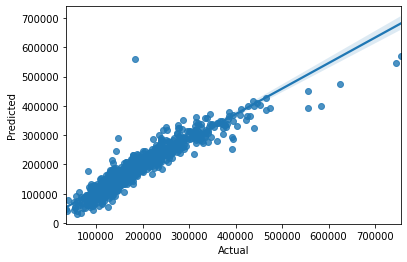

In [31]:
  sns.regplot(pred_actual_train.Actual , pred_actual_train.Predicted) 